##### 데싸노트의 실전에서 통하는 머신러닝 (골든레빗 MUST HAVE 시리즈)


- 문자 데이터셋을 분석해 스팸 문자를 필터링하고, 나이브 베이즈에 대한 이해 도모
- 나이브베이즈 : 쉽게 얘기하면 '무료라는 단어가 들어있을 때 해당 메일이 스팸일 확률'
- 이제 자연어 처리는 딥러닝이 더 탁월하겠지만 간단하게 한다면 나쁘지 않은 선택임
- 작은 훈련셋으로도 예측을 잘 하는데 모든 독립변수가 각각 독립적임을 전제로 수행함 (실제 데이터가 이럴 확률이 과연?)
- 종속변수 : target (스팸 여부)
- 독립변수 : text 1개 밖에 없지만 text 안에 있는 긴 문장에 대한 전처리가 필요함

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/spam.csv'
data = pd.read_csv(file_url)

In [2]:
# 데이터 형태 파악하기
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# 타겟에 spam이랑 ham말고 또 있으려나?
data['target'].unique()

array(['ham', 'spam'], dtype=object)

In [4]:
# 특수문자에 대한 전처리 수행을 하기 위해 string 라이브러리 호출

import string
string.punctuation # string안에 들어있는 특수문자 확인

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
# 특수문자 골라내기위한 함수 생성

def remove_punc(x):
    new_string = [] # 빈 리스트 생성
    for i in x: #문자열 순회
        if i not in string.punctuation: #특수문자가 없다면
            new_string.append(i) # 리스트에 추가
    new_string = ''.join(new_string) # 리스트를 문자열형태로 반환 / 이게 없다면 문자 하나하나 나옴
    return new_string

In [12]:
# 특수문자가 없어졌는지 확인
data['text'].apply(remove_punc)

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                  Will ü b going to esplanade fr home
5571    Pity  was in mood for that Soany other suggest...
5572    The guy did some bitching but I acted like id ...
5573                            Rofl Its true to its name
Name: text, Length: 5574, dtype: object

In [13]:
# 불용어 처리

import nltk # 패키지 설치 필요
nltk.download('stopwords') # 불용어 가져오기

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luck1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [14]:
# 영어 불용어 확인
# 참고로 한국어는 없고 https://www.ranks.nl/stopwords/korean 참조
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
# 리스트에 담겼던 문장을 다시 단어 단위로 쪼개고 소문자로 바꿔 넣을건데
# 불용어가 아닌 경우에만 바꿔줄겁니다

def stop_words(x):
    new_string = [] # 빈 리스트 생성
    for i in x.split(): # 문장 살펴보러 들어갑니다
        if i.lower() not in stopwords.words('english'): # 소문자로 바꿨는데 불용어가 아닐 때만
            new_string.append(i.lower()) # 리스트에 추가합니다
    new_string = ' '.join(new_string) # 공백 단위로 다시 묶기
    return new_string

In [16]:
# 결과 확인
data['text'] = data['text'].apply(stop_words)
data['text']

0       go jurong point, crazy.. available bugis n gre...
1                           ok lar... joking wif u oni...
2       free entry 2 wkly comp win fa cup final tkts 2...
3               u dun say early hor... u c already say...
4                 nah think goes usf, lives around though
                              ...                        
5569    2nd time tried 2 contact u. u £750 pound prize...
5570                         ü b going esplanade fr home?
5571             pity, * mood that. so...any suggestions?
5572    guy bitching acted like i'd interested buying ...
5573                                      rofl. true name
Name: text, Length: 5574, dtype: object

In [17]:
# target 에 있던 스팸 여부를 바꿔줍시다
# map() : 딕셔너리 타입 데이터를 사용해 매칭되는 값을 불러오도록 설정할 수 있음
data['target'] = data['target'].map({'spam':1, 'ham':0})
data['target']

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: target, Length: 5574, dtype: int64

In [18]:
# 카운트 기반 벡터화 수행
# 모든 단어를 사전처럼 모아서 인덱스를 부여하고, 문장마다 속한 단어가 있는 인덱스를 카운트함

x = data['text'] # 독립변수
y = data['target'] # 종속변수

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer() # 객체 생성
cv.fit(x) # 학습
cv.vocabulary_ # 단어와 인덱스 출력

{'go': 3563,
 'jurong': 4363,
 'point': 5945,
 'crazy': 2333,
 'available': 1313,
 'bugis': 1762,
 'great': 3647,
 'world': 8529,
 'la': 4490,
 'buffet': 1760,
 'cine': 2056,
 'got': 3607,
 'amore': 1080,
 'wat': 8307,
 'ok': 5525,
 'lar': 4526,
 'joking': 4331,
 'wif': 8431,
 'oni': 5554,
 'free': 3366,
 'entry': 2956,
 'wkly': 8487,
 'comp': 2173,
 'win': 8444,
 'fa': 3093,
 'cup': 2393,
 'final': 3214,
 'tkts': 7778,
 '21st': 412,
 'may': 4948,
 '2005': 403,
 'text': 7630,
 '87121': 794,
 'receive': 6327,
 'question': 6219,
 'std': 7266,
 'txt': 7971,
 'rate': 6271,
 'apply': 1167,
 '08452810075over18': 77,
 'dun': 2810,
 'say': 6666,
 'early': 2829,
 'hor': 3941,
 'already': 1052,
 'nah': 5258,
 'think': 7694,
 'goes': 3571,
 'usf': 8113,
 'lives': 4681,
 'around': 1217,
 'though': 7714,
 'freemsg': 3373,
 'hey': 3855,
 'darling': 2450,
 'week': 8354,
 'word': 8520,
 'back': 1360,
 'like': 4631,
 'fun': 3431,
 'still': 7289,
 'tb': 7564,
 'xxx': 8594,
 'chgs': 2010,
 'send': 6758,


In [20]:
x = cv.transform(x)
print(x)

  (0, 1080)	1
  (0, 1313)	1
  (0, 1760)	1
  (0, 1762)	1
  (0, 2056)	1
  (0, 2333)	1
  (0, 3563)	1
  (0, 3607)	1
  (0, 3647)	1
  (0, 4363)	1
  (0, 4490)	1
  (0, 5945)	1
  (0, 8307)	1
  (0, 8529)	1
  (1, 4331)	1
  (1, 4526)	1
  (1, 5525)	1
  (1, 5554)	1
  (1, 8431)	1
  (2, 77)	1
  (2, 403)	1
  (2, 412)	1
  (2, 794)	1
  (2, 1167)	1
  (2, 2173)	1
  :	:
  (5570, 3353)	1
  (5570, 3576)	1
  (5570, 3914)	1
  (5571, 1131)	1
  (5571, 5149)	1
  (5571, 5876)	1
  (5571, 7061)	1
  (5571, 7407)	1
  (5571, 7656)	1
  (5572, 913)	1
  (5572, 1556)	1
  (5572, 1797)	1
  (5572, 2898)	1
  (5572, 3366)	1
  (5572, 3481)	1
  (5572, 3701)	1
  (5572, 4177)	1
  (5572, 4631)	1
  (5572, 5355)	1
  (5572, 7086)	1
  (5572, 8103)	1
  (5572, 8354)	1
  (5573, 5264)	1
  (5573, 6535)	1
  (5573, 7923)	1


- 출력 형태가
- (데이터의 행 번호, 단어의 인덱스 값) 행에서 출연횟수
- 데이터 행 번호는 쉽게 얘기하면 몇 번째 줄인가
- 인덱스 값은 쉽게 얘기하면 사전을 하나 만들었다고 이해하면 될 것이고
- 몇 번째 줄에 우리가 만들었던 사전에 있는 그 단어가 몇 번 튀어나왔다라고 보면 되겠네요

In [21]:
# 정말 그런지 봅시다
data.loc[0]['text']

'go jurong point, crazy.. available bugis n great world la e buffet... cine got amore wat...'

In [22]:
# 위에서 나온 값하고 비교해봅시다
print(cv.vocabulary_['go'])
print(cv.vocabulary_['jurong'])
print(cv.vocabulary_['point'])

3563
4363
5945


In [23]:
# 이제 모델링 해볼거임
# 그 전에 데이터 세트들 만들어줍시다

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [24]:
# 나이브 베이즈는 MultinomialNB 사용

from sklearn.naive_bayes import MultinomialNB

# 모든 머신러닝 기법이 그러하듯
model = MultinomialNB() # 모델 만들고
model.fit(x_train, y_train) # 학습시키고
pred = model.predict(x_test) # 예측시키고

In [25]:
# 정확도 봅시다

from sklearn.metrics import accuracy_score, confusion_matrix

print(f'정확도 : {accuracy_score(y_test, pred)}')
print(confusion_matrix(y_test,pred))

정확도 : 0.989237668161435
[[969   8]
 [  4 134]]


<AxesSubplot:>

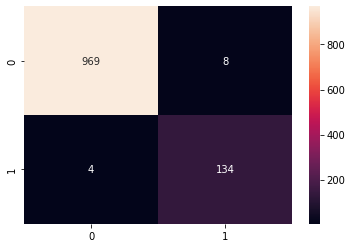

In [26]:
# 혼돈행렬을 히트맵으로 봐볼까요
# fmt : format (어떻게 숫자 표시할거냐. 여기서는 .0f니까 소숫점 없이 출력)
sns.heatmap(confusion_matrix(y_test,pred), annot=True, fmt='.0f')

- 여기서 생각해볼 거는 스팸메일은 1종 오류가 중요한가 2종 오류가 중요한가
- 당연히 2종 오류! 2종 오류는 암에 걸린 사람한테 암에 안 걸렸다고 하는 거임
- 혼동행렬이 나왔으니 재현율(Recall), 정확도(Precision), F-1 Score, AUC 등등을 생각해봅시다

### 베이즈 정리

* P(A|B) = P(B|A) * P(A) / P(B)

- P(A) : 사전확률. B의 발생유무와 관계없이 A가 발생할 확률. 여기서는 전체 문자 중 스팸메일의 비율
- P(B) : 전체에서 B가 발생할 확률. 여기서는 B라는 특정 단어가 들어있을 확률.
- P(A|B) : 사후확률. B가 발생했을 때 A가 발생할 확률. 여기서는 B라는 특정 단어가 들어갔을 때 A가 스팸일 확률
- P(B|A) : 우도 or 가능도. A가 발생했을 때 B가 발생할 확률. 스팸메일일 경우 B라는 특정 단어가 들어갔을 확률